In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#to avoid the dotted lines while displaying columns and rows
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",50)

In [130]:
df = pd.read_csv('2018.csv')

In [132]:
df.shape

(7213446, 28)

In [133]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,NaN,0.00,268.00,250.00,225.00,1605.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,NaN,0.00,99.00,83.00,65.00,414.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,NaN,0.00,134.00,126.00,106.00,846.00,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,NaN,0.00,190.00,182.00,157.00,1120.00,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,NaN,0.00,112.00,106.00,83.00,723.00,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [135]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [136]:
#df.describe()
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7213446.00,7213446.00,7101129.00,7096212.00,7097616.00,7097617.00,7094200.00,7094200.00,7213446.00,7094201.00,7076406.00,7213446.00,7213446.00,7213436.00,7079004.00,7079004.00,7213446.00,1352710.00,1352710.00,1352710.00,1352710.00,1352710.00,0.00
mean,2607.53,1329.69,1333.85,9.97,17.41,1357.80,1462.16,7.60,1486.34,1466.78,5.05,0.02,0.00,141.14,136.50,111.50,799.99,19.46,3.64,15.89,0.09,25.64,NaN
std,1860.12,490.93,504.51,44.83,9.92,505.97,533.47,6.06,518.31,537.71,46.93,0.13,0.05,73.34,73.14,71.11,598.18,58.91,30.00,35.89,3.17,49.79,NaN
min,1.00,1.00,1.00,-122.00,1.00,1.00,1.00,1.00,1.00,1.00,-120.00,0.00,0.00,-99.00,14.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,1029.00,915.00,916.00,-5.00,11.00,932.00,1044.00,4.00,1100.00,1049.00,-14.00,0.00,0.00,88.00,83.00,60.00,363.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,2131.00,1320.00,1326.00,-2.00,15.00,1340.00,1502.00,6.00,1515.00,1506.00,-6.00,0.00,0.00,122.00,118.00,92.00,632.00,0.00,0.00,3.00,0.00,3.00,NaN
75%,4074.00,1735.00,1744.00,7.00,20.00,1759.00,1911.00,9.00,1919.00,1916.00,8.00,0.00,0.00,171.00,167.00,141.00,1034.00,17.00,0.00,20.00,0.00,31.00,NaN
max,7909.00,2359.00,2400.00,2710.00,196.00,2400.00,2400.00,259.00,2400.00,2400.00,2692.00,1.00,1.00,704.00,757.00,696.00,4983.00,2109.00,2692.00,1848.00,987.00,2454.00,NaN


In [137]:
df.describe(include='object')

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CANCELLATION_CODE
count,7213446,7213446,7213446,7213446,116584
unique,365,18,358,358,4
top,2018-11-25,WN,ATL,ATL,B
freq,22160,1352552,390046,390079,61984


In [138]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

The reason for cancellation of flights splits into the following occurrences:

A - Airline/Carrier
B - Weather
C - National Air System
D - Security

In [139]:
# group by CANCELLATION_CODE to see the ratio
df['CANCELLATION_CODE'].value_counts()

B    61984
A    29484
C    25072
D       44
Name: CANCELLATION_CODE, dtype: int64

Here, we can see that the main reason for cancellation is code B, i.e., "Weather".
Weather is often the cause of delays and cancelations.

I will focus on two or three methods in this notebook to deal with null value data or missing data.

One option is to delete the corresponding rows.

Another case of handling missing or null value data is to reconstruct the missing data according to information from other columns. Imagine there is a start and an end time and only the duration is missing. You could calculate the missing values simply by the difference between end time and start time. Accordingly, you do not have to delete the data column but you can continue to use the information contained in it.

One of the best ways to handle missing or null value data is the imputation. The imputation will fill the missing gaps with some numbers that are based on existing data columns. The numbers are not as accurate as the real data but fits the needs for the most prediction models and lead to a better resolution of the model.

In [140]:
# -------------------------------------
# converting categoric value to numeric
df.loc[df['CANCELLATION_CODE'] == 'A', 'CANCELLATION_CODE'] = 1
df.loc[df['CANCELLATION_CODE'] == 'B', 'CANCELLATION_CODE'] = 2
df.loc[df['CANCELLATION_CODE'] == 'C', 'CANCELLATION_CODE'] = 3
df.loc[df['CANCELLATION_CODE'] == 'D', 'CANCELLATION_CODE'] = 4

# -----------------------------------
# converting NaN data to numeric zero
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].fillna(0)

The missing data (or Not-a-Number data) is not based on a bad data quality, it is more the fact that it didn't happen any action by these delay features. You can prove it by looking at a tuple of one of that features when there is at least one feature triggered, all the other features are "initialized" with "0.0":

In [141]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE            0
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [142]:
columns_to_fill = ['NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','CARRIER_DELAY']

for col in columns_to_fill:
    df[col] = df[col].fillna(0)

In [143]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE            0
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
Unnamed: 27            7213446
dtype: int64

We can see that important column for analysis have been dealt with. The column Unnamed: 27 have 7213446 which close to 99 % of the total data so we drop this column

In [144]:
df = df.drop('Unnamed: 27', axis=1)

In [145]:
df.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY              117234
TAXI_OUT               115830
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                119246
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY              137040
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME           10
ACTUAL_ELAPSED_TIME    134442
AIR_TIME               134442
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64

## Canceled flights EDA 

In [146]:
# Total number of canceled flights
df.CANCELLED.sum()

116584.0

In [147]:
# Let's explore column CANCELLED
df.CANCELLED.unique()

array([0., 1.])

In [148]:
# From above we see it's binary: 0 or 1, let's see how it looks like
cancelled = df[(df['CANCELLED'] > 0)]

In [149]:
cancelled.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
178,2018-01-01,UA,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.00,2,0.00,81.00,NaN,NaN,316.00,0.00,0.00,0.00,0.00,0.00
875,2018-01-01,UA,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.00,1,0.00,102.00,NaN,NaN,414.00,0.00,0.00,0.00,0.00,0.00
1244,2018-01-01,UA,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.00,2,0.00,78.00,NaN,NaN,316.00,0.00,0.00,0.00,0.00,0.00
1584,2018-01-01,AS,5,DCA,LAX,910,NaN,NaN,NaN,NaN,NaN,NaN,1230,NaN,NaN,1.00,1,0.00,380.00,NaN,NaN,2311.00,0.00,0.00,0.00,0.00,0.00
1639,2018-01-01,AS,64,WRG,KTN,1623,NaN,NaN,NaN,NaN,NaN,NaN,1655,NaN,NaN,1.00,2,0.00,32.00,NaN,NaN,82.00,0.00,0.00,0.00,0.00,0.00


## Cancelled EDA Conclusion 

Canceled flights are not delayed flights
If canceled, the flight didn't happen, and values are NaN
We can filter out Canceled Flights for out analysis
DEP_DELAY Actual Departure Time
ARR_DELAY Total Delay on Arrival in minutes
If both of these numbers are negative =>> there was no delay

In [73]:
# Leaving only non-canceled flights
df = df[(df['CANCELLED'] == 0)]

In [74]:
df.CANCELLED.unique()

array([0.])

In [75]:
df.isnull().sum()

FL_DATE                    0
OP_CARRIER                 0
OP_CARRIER_FL_NUM          0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY               4743
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON               2662
TAXI_IN                 2662
CRS_ARR_TIME               0
ARR_TIME                2661
ARR_DELAY              20456
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME    17858
AIR_TIME               17858
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
dtype: int64

We can drop the NaN rows as these columns have time related data and we can not take replace that data, if we do so that can affect the data

In [76]:
# drop the last 1% of missing data rows.
df = df.dropna(axis=0)

In [77]:
df.CANCELLED.sum()

0.0

In [78]:
df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [79]:
df.shape

(7071817, 27)

In [80]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,0,0.00,268.00,250.00,225.00,1605.00,0.00,0.00,0.00,0.00,0.00
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,0,0.00,99.00,83.00,65.00,414.00,0.00,0.00,0.00,0.00,0.00
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,0,0.00,134.00,126.00,106.00,846.00,0.00,0.00,0.00,0.00,0.00
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,0,0.00,190.00,182.00,157.00,1120.00,0.00,0.00,0.00,0.00,0.00
4,2018-01-01,UA,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,0,0.00,112.00,106.00,83.00,723.00,0.00,0.00,0.00,0.00,0.00


In [81]:
df2 = pd.read_csv("airlines.csv")

In [82]:
df2

,IATA_CODE,AIRLINE
0,9E,Endeavor Air
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet
6,F9,Frontier Airlines Inc.
7,G4,Allegiant Air
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [83]:
x = list(df2.columns)
x[0] = 'OP_CARRIER'
df2.columns  = x
df2.head()

,OP_CARRIER,AIRLINE
0,9E,Endeavor Air
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [84]:
df = pd.merge(df, df2, on='OP_CARRIER',how ='inner')

In [85]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,0,0.00,268.00,250.00,225.00,1605.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,0,0.00,99.00,83.00,65.00,414.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,0,0.00,134.00,126.00,106.00,846.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,0,0.00,190.00,182.00,157.00,1120.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
4,2018-01-01,UA,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,0,0.00,112.00,106.00,83.00,723.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.


In [86]:
df = df.drop('OP_CARRIER', axis=1)

In [87]:
df.head()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE
0,2018-01-01,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,0,0.00,268.00,250.00,225.00,1605.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
1,2018-01-01,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,0,0.00,99.00,83.00,65.00,414.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
2,2018-01-01,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,0,0.00,134.00,126.00,106.00,846.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
3,2018-01-01,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,0,0.00,190.00,182.00,157.00,1120.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
4,2018-01-01,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,0,0.00,112.00,106.00,83.00,723.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.


In [88]:
x = list(df.columns)
x[-1] = 'OP_CARRIER'
df.columns  = x
df.head()

,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER
0,2018-01-01,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,0,0.00,268.00,250.00,225.00,1605.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
1,2018-01-01,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,0,0.00,99.00,83.00,65.00,414.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
2,2018-01-01,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,0,0.00,134.00,126.00,106.00,846.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
3,2018-01-01,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,0,0.00,190.00,182.00,157.00,1120.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.
4,2018-01-01,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,0,0.00,112.00,106.00,83.00,723.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.


In [89]:
df.isnull().sum()

FL_DATE                0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
OP_CARRIER             0
dtype: int64

In [90]:
df.shape

(7071817, 27)

In [91]:
from datetime import datetime

# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
# Add FL_MONTH column
df['FL_MONTH'] = df['FL_DATE'].dt.month
# Add FL_DAYOFWEEK column
df['FL_DAYOFWEEK'] = df['FL_DATE'].dt.dayofweek + 1  # Monday = 0, Sunday = 6

df.head()


,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,OP_CARRIER,FL_MONTH,FL_DAYOFWEEK
0,2018-01-01,2429,EWR,DEN,1517,1512.00,-5.00,15.00,1527.00,1712.00,10.00,1745,1722.00,-23.00,0.00,0,0.00,268.00,250.00,225.00,1605.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.,1,1
1,2018-01-01,2427,LAS,SFO,1115,1107.00,-8.00,11.00,1118.00,1223.00,7.00,1254,1230.00,-24.00,0.00,0,0.00,99.00,83.00,65.00,414.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.,1,1
2,2018-01-01,2426,SNA,DEN,1335,1330.00,-5.00,15.00,1345.00,1631.00,5.00,1649,1636.00,-13.00,0.00,0,0.00,134.00,126.00,106.00,846.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.,1,1
3,2018-01-01,2425,RSW,ORD,1546,1552.00,6.00,19.00,1611.00,1748.00,6.00,1756,1754.00,-2.00,0.00,0,0.00,190.00,182.00,157.00,1120.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.,1,1
4,2018-01-01,2424,ORD,ALB,630,650.00,20.00,13.00,703.00,926.00,10.00,922,936.00,14.00,0.00,0,0.00,112.00,106.00,83.00,723.00,0.00,0.00,0.00,0.00,0.00,United Air Lines Inc.,1,1


## Delay EDA 

In [92]:
# To do this analysis right, let's filter all negative numbers in ARR_DELAY column
# Number of delayed flights 
df[df.ARR_DELAY > 0 ].count()

FL_DATE                2514852
OP_CARRIER_FL_NUM      2514852
ORIGIN                 2514852
DEST                   2514852
CRS_DEP_TIME           2514852
DEP_TIME               2514852
DEP_DELAY              2514852
TAXI_OUT               2514852
WHEELS_OFF             2514852
WHEELS_ON              2514852
TAXI_IN                2514852
CRS_ARR_TIME           2514852
ARR_TIME               2514852
ARR_DELAY              2514852
CANCELLED              2514852
CANCELLATION_CODE      2514852
DIVERTED               2514852
CRS_ELAPSED_TIME       2514852
ACTUAL_ELAPSED_TIME    2514852
AIR_TIME               2514852
DISTANCE               2514852
CARRIER_DELAY          2514852
WEATHER_DELAY          2514852
NAS_DELAY              2514852
SECURITY_DELAY         2514852
LATE_AIRCRAFT_DELAY    2514852
OP_CARRIER             2514852
FL_MONTH               2514852
FL_DAYOFWEEK           2514852
dtype: int64

In [93]:
# Filter out non-delayed flights < 0 DEP_DELAY
df = df[(df['ARR_DELAY'] > 0)]

In [94]:
# Minutes to hours 
df['ARR_DELAY'] = df['ARR_DELAY'] / 60

# Minutes to hours 
df['DEP_DELAY'] = df['DEP_DELAY'] / 60

In [95]:
# Down from 7.2 to 2.5 million (relevant) records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514852 entries, 4 to 7071814
Data columns (total 29 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER_FL_NUM    int64         
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_TIME             float64       
 6   DEP_DELAY            float64       
 7   TAXI_OUT             float64       
 8   WHEELS_OFF           float64       
 9   WHEELS_ON            float64       
 10  TAXI_IN              float64       
 11  CRS_ARR_TIME         int64         
 12  ARR_TIME             float64       
 13  ARR_DELAY            float64       
 14  CANCELLED            float64       
 15  CANCELLATION_CODE    int64         
 16  DIVERTED             float64       
 17  CRS_ELAPSED_TIME     float64       
 18  ACTUAL_ELAPSED_TIME  float64       
 19  AIR_TIME             

## Proportion of flights an airport is having 

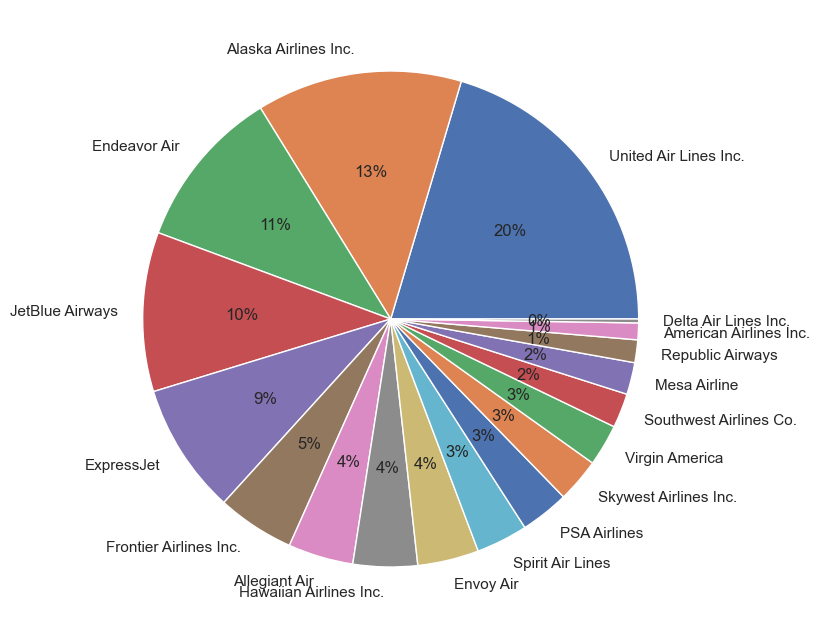

In [96]:
fig_dim = (8,10)
f, ax = plt.subplots(figsize=fig_dim)
quality=df["OP_CARRIER"].unique()
size=df["OP_CARRIER"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

In [97]:
# Here we can see United Airlines having high number of flights, i.e., busiest airport

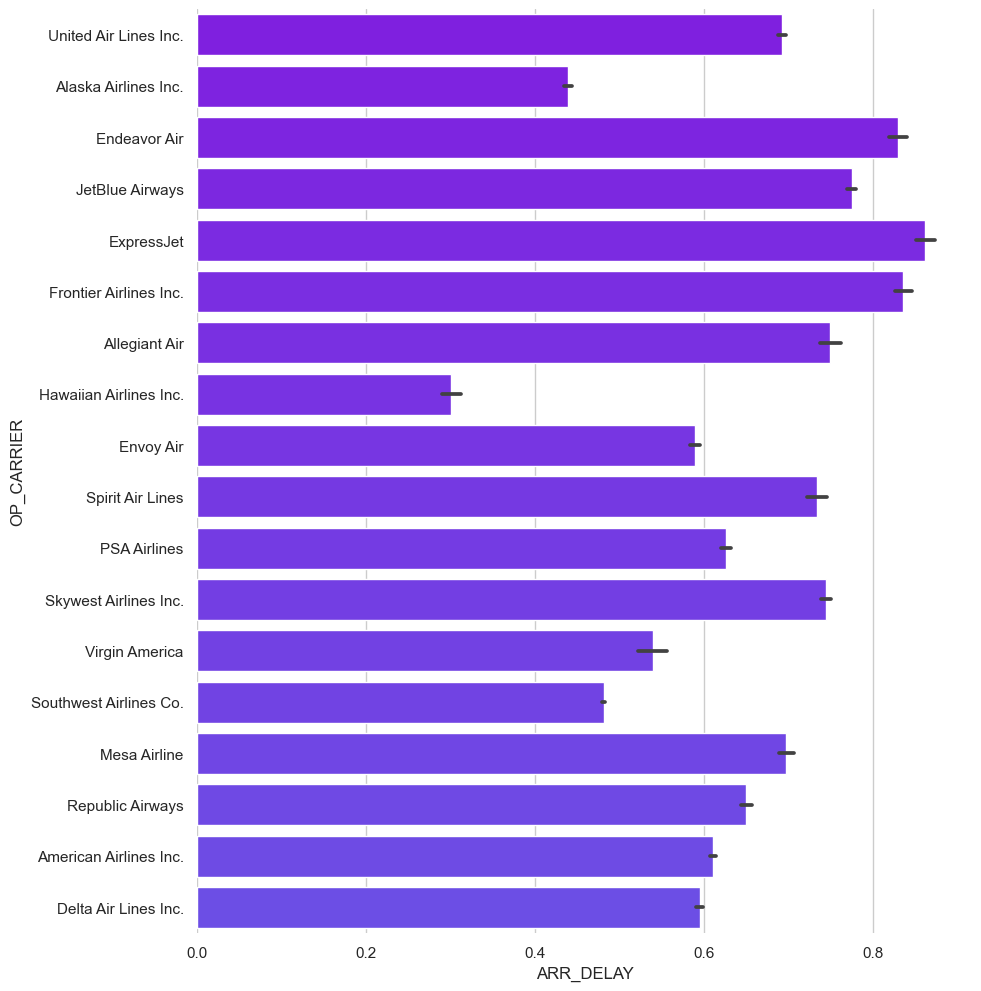

In [99]:
sns.set(style="whitegrid")

# Initialize the figure
fig_dim = (10, 12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

cmap = plt.get_cmap("rainbow")
colors = [cmap(i) for i in range(len(df['OP_CARRIER'].unique()))]

# Create a bar plot
sns.barplot(x="ARR_DELAY", y="OP_CARRIER",
            data=df, palette=colors
            )
plt.show()

In [101]:
# Group by airline and sum up / count the values
df_flights_grouped_sum = df.groupby('OP_CARRIER', as_index= False)['ARR_DELAY'].agg('sum').rename(columns={"ARR_DELAY":"ARRIVAL_DELAY_SUM"})
df_flights_grouped_cnt = df.groupby('OP_CARRIER', as_index= False)['ARR_DELAY'].agg('count').rename(columns={"ARR_DELAY":"ARRIVAL_DELAY_CNT"})

# Merge the two groups together
df_flights_grouped_delay = df_flights_grouped_sum.merge(df_flights_grouped_cnt, left_on='OP_CARRIER', right_on='OP_CARRIER', how='inner')
# Calculate the average delay per airline
df_flights_grouped_delay.loc[:,'AVG_DELAY_AIRLINE'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

df_flights_grouped_delay.sort_values('AVG_DELAY_AIRLINE', ascending=False)

,OP_CARRIER,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_CNT,AVG_DELAY_AIRLINE
6,ExpressJet,58792.38,68244,0.86
7,Frontier Airlines Inc.,43788.67,52413,0.84
4,Endeavor Air,59826.60,72119,0.83
9,JetBlue Airways,98359.87,126936,0.77
1,Allegiant Air,27839.83,37177,0.75
13,Skywest Airlines Inc.,197331.25,265057,0.74
15,Spirit Air Lines,41330.80,56368,0.73
10,Mesa Airline,55496.83,79640,0.70
16,United Air Lines Inc.,148376.58,214528,0.69
12,Republic Airways,65229.28,100385,0.65


In [167]:
# Here, we can see airport having least amount of delays is Hawaiian Airlines Inc. with avg delay of 86%
# Airport having highest amount of delays is ExpressJet with avg delay of 30%

## Number of flights delayed each month 

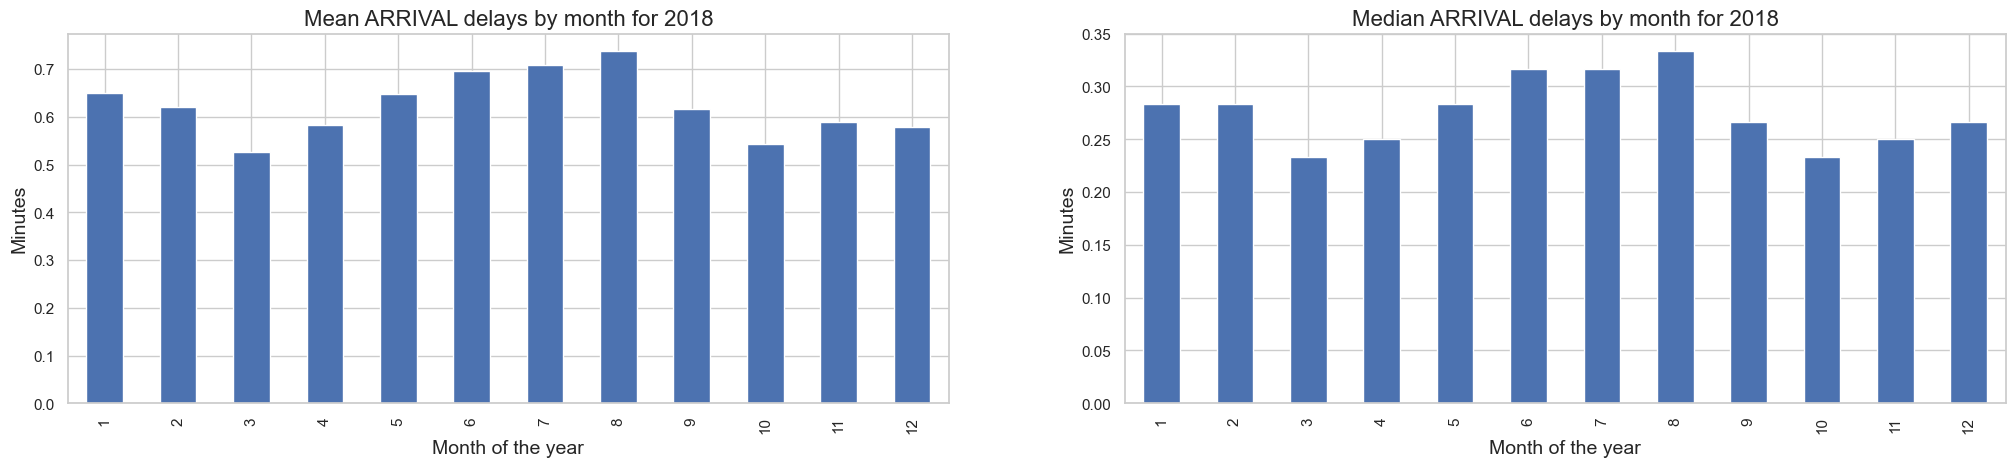

In [102]:
df['FL_DATE_month'] = pd.to_datetime(df['FL_DATE']).dt.month

plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
df.groupby('FL_DATE_month')['ARR_DELAY'].mean().plot.bar()
plt.title('Mean ARRIVAL delays by month for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2, 2)
df.groupby('FL_DATE_month')['ARR_DELAY'].median().plot.bar()
plt.title('Median ARRIVAL delays by month for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

## Number of flights delay per Week of year 

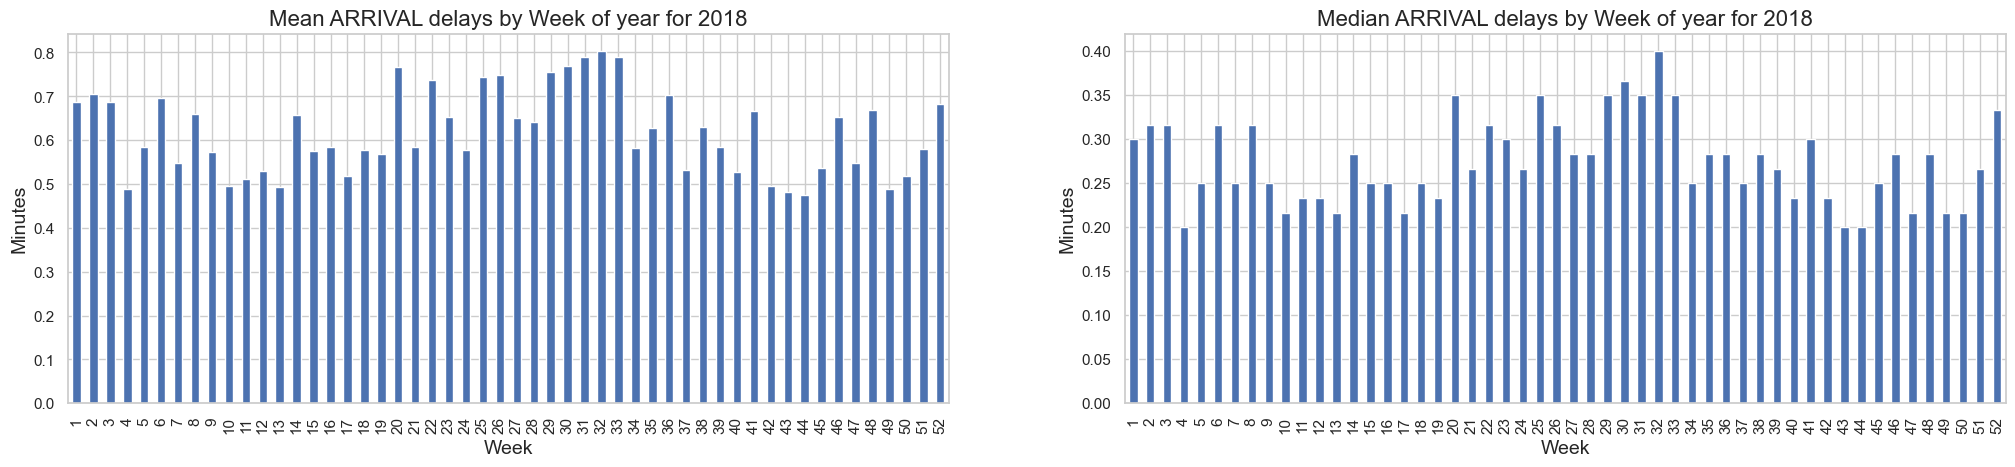

In [103]:
df['FL_DATE_weekofyear'] = pd.to_datetime(df['FL_DATE']).dt.weekofyear

plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
df.groupby('FL_DATE_weekofyear')['ARR_DELAY'].mean().plot.bar()
plt.title('Mean ARRIVAL delays by Week of year for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Week', fontsize=14)

plt.subplot(2, 2, 2)
df.groupby('FL_DATE_weekofyear')['ARR_DELAY'].median().plot.bar()
plt.title('Median ARRIVAL delays by Week of year for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Week', fontsize=14)

plt.show()

## Number of flights delay per Day of Week 

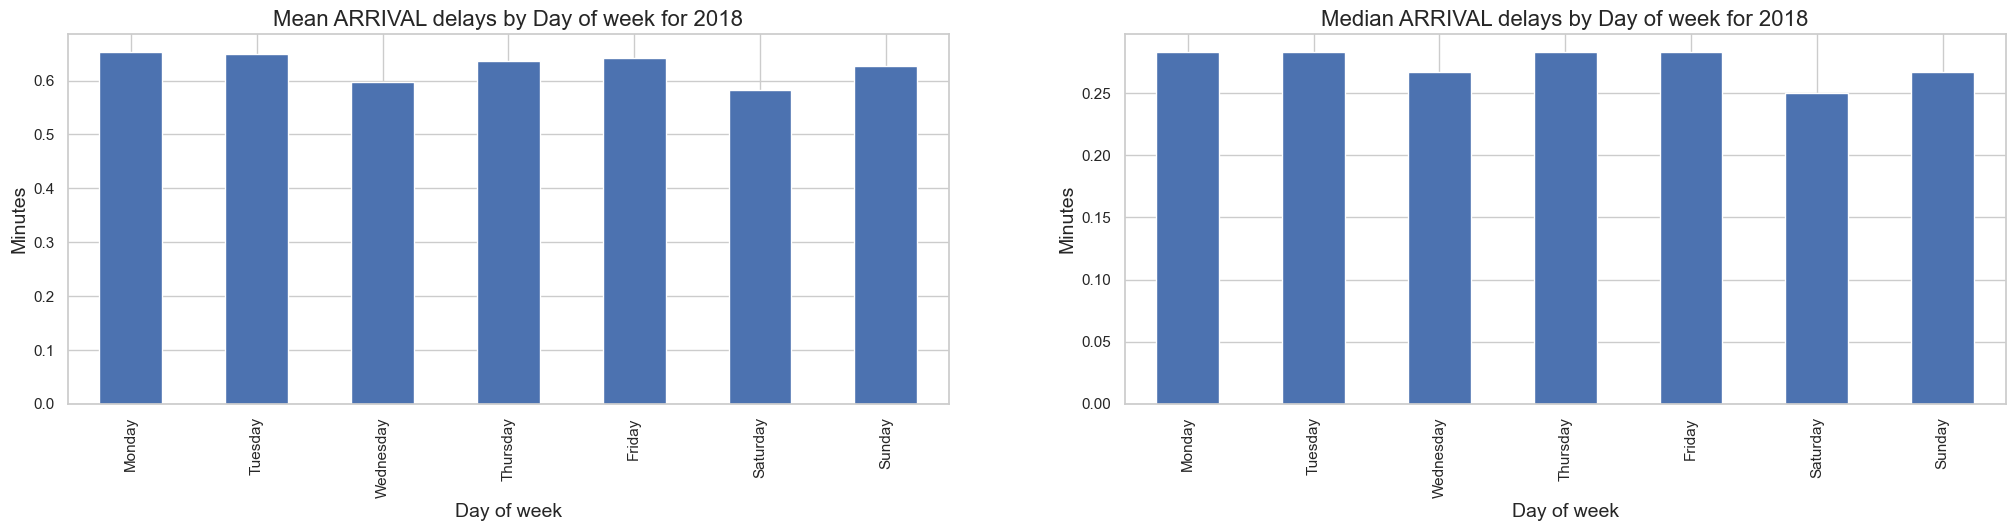

In [104]:
df['FL_DATE_dayofweek'] = pd.to_datetime(df['FL_DATE']).dt.dayofweek

plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
df.groupby('FL_DATE_dayofweek')['ARR_DELAY'].mean().plot.bar()
plt.title('Mean ARRIVAL delays by Day of week for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.subplot(2, 2, 2)
df.groupby('FL_DATE_dayofweek')['ARR_DELAY'].median().plot.bar()
plt.title('Median ARRIVAL delays by Day of week for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

## Number of flights Delay per quarter of Year

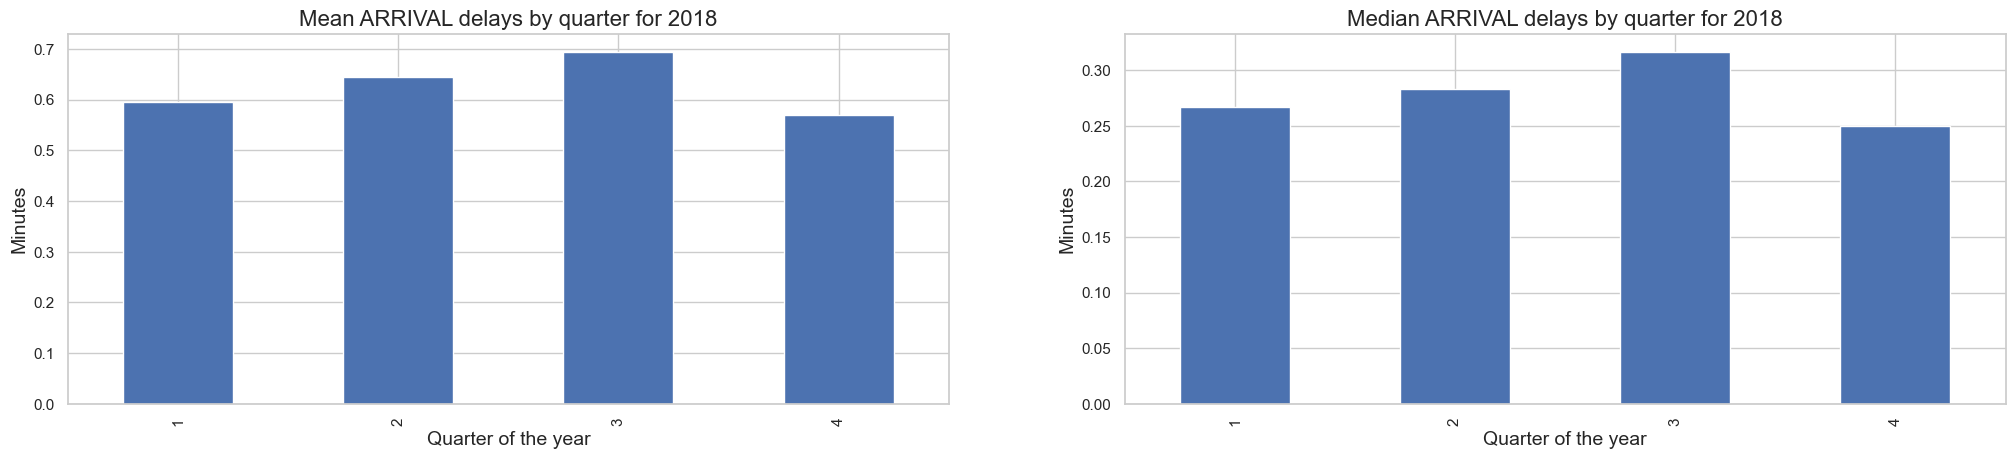

In [105]:
df['FL_DATE_quarter'] = pd.to_datetime(df['FL_DATE']).dt.quarter

plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
df.groupby('FL_DATE_quarter')['ARR_DELAY'].mean().plot.bar()
plt.title('Mean ARRIVAL delays by quarter for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Quarter of the year', fontsize=14)

plt.subplot(2, 2, 2)
df.groupby('FL_DATE_quarter')['ARR_DELAY'].median().plot.bar()
plt.title('Median ARRIVAL delays by quarter for 2018', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Quarter of the year', fontsize=14)

plt.show()

## Analysing flights having wheels off time 

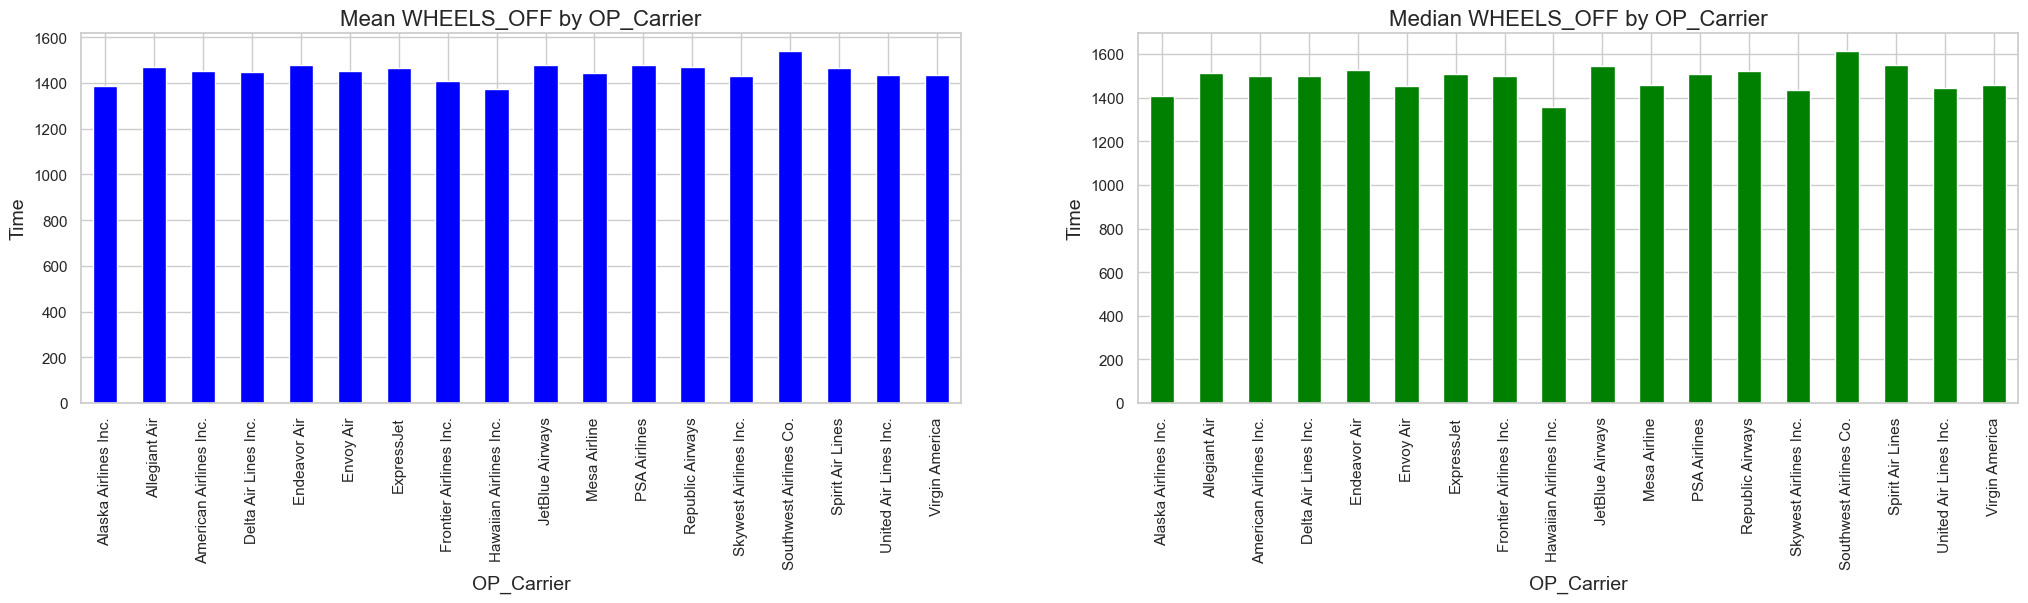

In [106]:
plt.figure(figsize=(25, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
df.groupby('OP_CARRIER')['WHEELS_OFF'].mean().plot.bar(color='blue')
plt.title('Mean WHEELS_OFF by OP_Carrier', fontsize=16)
plt.ylabel('Time', fontsize=14)
plt.xlabel('OP_Carrier', fontsize=14)

plt.subplot(2, 2, 2)
df.groupby('OP_CARRIER')['WHEELS_OFF'].median().plot.bar(color='green')
plt.title('Median WHEELS_OFF by OP_Carrier', fontsize=16)
plt.ylabel('Time', fontsize=14)
plt.xlabel('OP_Carrier', fontsize=14)

plt.show()

In [168]:
# Airport having least amount of wheels of time : Hawaiian Airlines Inc.
# Airport having least amount of wheels of time : Southwest Airlines Co.

## Number of Canceled flights by airline 

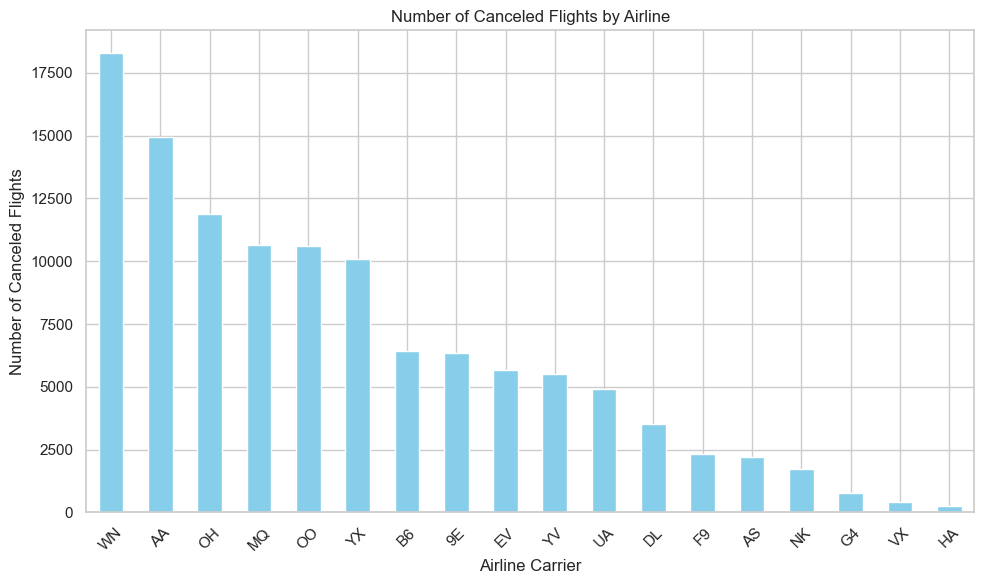

In [160]:
# Group by airline carrier and count canceled flights
carrier_cancel_counts = cancelled['OP_CARRIER'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
carrier_cancel_counts.plot(kind='bar',color='skyblue')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Canceled Flights')
plt.title('Number of Canceled Flights by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
# Southwest Airlines Co. have most number of cancelled flights
# Hawaiian Airlines Inc. have the least

##  Number of Canceled flights by City

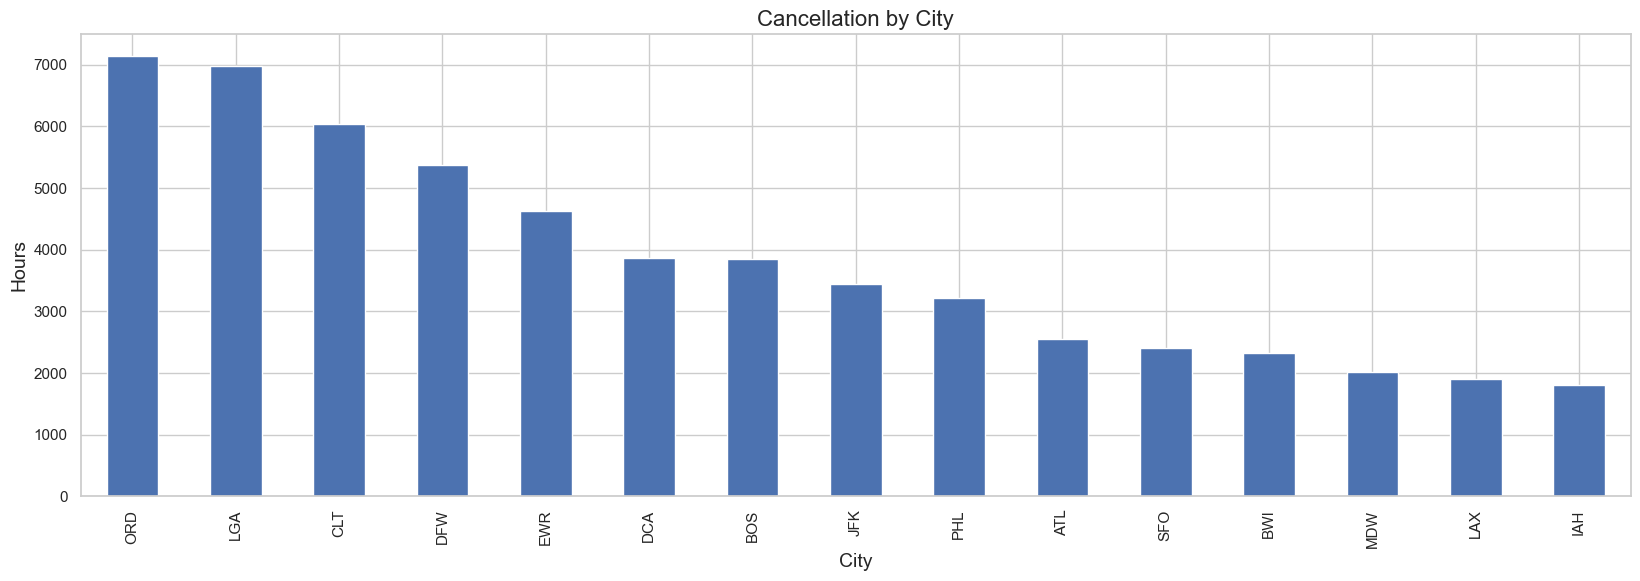

In [166]:
# Cancels by City
city_by_cancel = df.groupby('ORIGIN').CANCELLED.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_cancel[:15].plot.bar()
plt.title('Cancellation by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Hours', fontsize=14)
plt.show()

In [165]:
# Chicago(ORD) city has most number of cancelled flights, followed by Queens, New York City(LGA)
# Houston, Texas has least number of cancelled flights

## Total distance covered by each airport

In [171]:
# Group by airline carrier and sum up distances
carrier_distance = df.groupby('OP_CARRIER')['DISTANCE'].sum()

# Create a DataFrame for the results
result_df = pd.DataFrame({
    'Airline Carrier': carrier_distance.index,
    'Total Distance Covered': carrier_distance.values
})

print(result_df)


   Airline Carrier  Total Distance Covered
0               9E            117046110.00
1               AA            933094276.00
2               AS            320874363.00
3               B6            325990368.00
4               DL            842409169.00
5               EV             95767746.00
6               F9            124095368.00
7               G4             85050295.00
8               HA             56766281.00
9               MQ            127857422.00
10              NK            181413538.00
11              OH            106915192.00
12              OO            371959406.00
13              UA            735789154.00
14              VX             26066678.00
15              WN           1012847097.00
16              YV            118830220.00
17              YX            187908301.00


## Average of arrival time of each airline 

In [173]:
# Group by airline carrier and calculate average ARR_TIME
carrier_avg_arr_time = df.groupby('OP_CARRIER')['ARR_TIME'].mean()

# Create a DataFrame for the results
result_df = pd.DataFrame({
    'Airline Carrier': carrier_avg_arr_time.index,
    'Average ARR_TIME': carrier_avg_arr_time.values
})
result_df = result_df.sort_values(by='Average ARR_TIME', ascending=False)
print(result_df)

   Airline Carrier  Average ARR_TIME
14              VX           1526.35
7               G4           1520.90
16              YV           1487.63
4               DL           1484.76
17              YX           1480.75
11              OH           1478.42
0               9E           1475.36
5               EV           1474.41
1               AA           1470.57
12              OO           1470.45
2               AS           1467.85
9               MQ           1467.85
15              WN           1460.83
13              UA           1458.30
10              NK           1447.33
6               F9           1427.44
8               HA           1419.43
3               B6           1399.38


## Delay Study 

In [114]:
delay = df[["CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY","ARR_DELAY","DEP_DELAY"]]

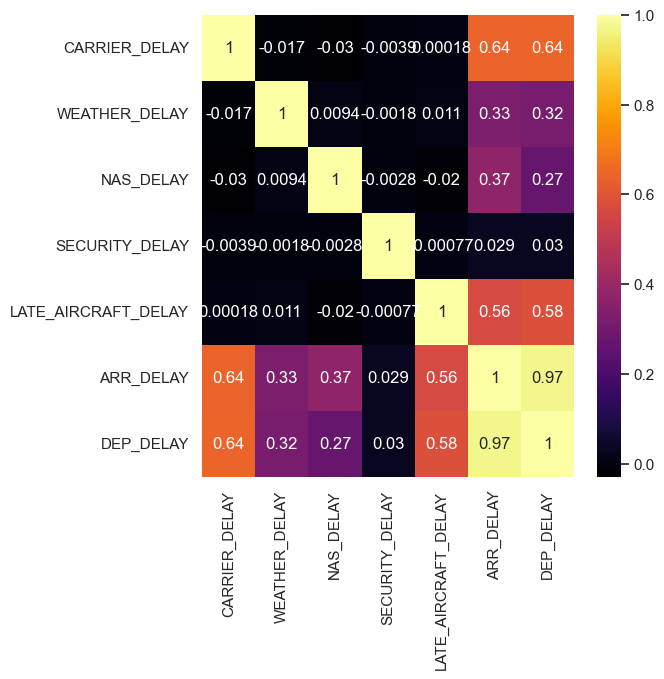

In [115]:
# Dataframe correlation
del_corr = delay.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(6, 6))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

In [116]:
# Here, we can see that ARR_DELAY, AND DEP_DELAY has high positive correlation with CARRIER_DELAY
# SECURITY_DELAY shows less or negative correlation with all the attributes mentioned

In [117]:
df['Delayed'] = (df['ARR_DELAY'] >= 10).astype(int)

In [118]:
df.columns

Index(['FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'OP_CARRIER', 'FL_MONTH', 'FL_DAYOFWEEK', 'FL_DATE_month',
       'FL_DATE_weekofyear', 'FL_DATE_dayofweek', 'FL_DATE_quarter',
       'Delayed'],
      dtype='object')

In [119]:
# Define a function to map departure time to time slots
def map_to_time_slot(dep_time):
    if dep_time <= 800:
        return 1
    elif 800 < dep_time <= 1200:
        return 2
    elif 1200 < dep_time <= 1600:
        return 3
    elif 1600 < dep_time <= 2100:
        return 4
    else:
        return 1

# Apply the function to create the 'TimeSlot' column
df['TimeSlot'] = df['DEP_TIME'].apply(map_to_time_slot)

# Create dictionaries for carrier and origin mappings
carrier_mapping = {carrier: index for index, carrier in enumerate(df['OP_CARRIER'].unique())}
origin_mapping = {origin: index for index, origin in enumerate(df['ORIGIN'].unique())}

# Apply mappings to create 'INDEX_CARRIER' and 'INDEX_ORIGIN' columns
df['INDEX_CARRIER'] = df['OP_CARRIER'].map(carrier_mapping)
df['INDEX_ORIGIN'] = df['ORIGIN'].map(origin_mapping)

# Group by 'OP_CARRIER' and 'INDEX_CARRIER', count, and sort
result = df.groupby(['OP_CARRIER', 'INDEX_CARRIER']).size().reset_index(name='count').sort_values('INDEX_CARRIER')

In [129]:
mod_df = ['DEP_DELAY',
             'DISTANCE', 
             'FL_DAYOFWEEK',
             'INDEX_CARRIER', 
             'TimeSlot',
             'FL_MONTH',
             'ACTUAL_ELAPSED_TIME',
             'INDEX_ORIGIN',
             'Delayed']
new_df = df[mod_df].copy()

In [124]:
# independent variable
x = new_df.iloc[:,:-1].values

# dependent variable or class label
y = new_df.iloc[:,-1].values

In [125]:
# splitting of data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [126]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
logreg = LogisticRegression(C=1,max_iter=5 ,random_state=0)
# Fit the model to the training data
logreg.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=5, random_state=0)

In [127]:
log_model_pred = logreg.predict(x_test)

In [128]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(y_test,log_model_pred))
print()
print("The Accuracy Score for Logistic Regression: ",accuracy_score(log_model_pred,y_test))
print()
print("The F1-score for Logistic Regression: ",f1_score(log_model_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    501866
           1       0.43      0.63      0.51      1105

    accuracy                           1.00    502971
   macro avg       0.71      0.82      0.76    502971
weighted avg       1.00      1.00      1.00    502971


The Accuracy Score for Logistic Regression:  0.9973398068675927

The F1-score for Logistic Regression:  0.5116788321167883
